# Exploring the Iris Dataset 

Fisher's famous Iris dataset was collected in the 1930s as part of his statistics work. Here some simple analysis is carried out in line with the examples in the Python Data Science Handbook. We begin by importing the required libraries:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.mixture import GMM
import seaborn as sns

We now load the Iris dataset and split it up into the usual target vector and features matrix form. We then parition that dataset into training and test parts.

In [6]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1) #Remove species feature to leave features matrix
y_iris = iris['species'] #Target vector
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1) #Partition the dataset

We now apply a naive Gaussian Bayes to model and predict species labels. 

In [7]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest) 

We now assess the fit of the model.

In [8]:
result = accuracy_score(ytest, y_model)
print('The accuracy score is: {}'.format(result))

The accuracy score is: 0.9736842105263158


We thus see that even a simple classification is very effective for our dataset.

We now turn to unsupervised algorithms to reduce the dimensionality of the dataset to allow more straightforward visualisation. This is done using principal component analysis (PCA).

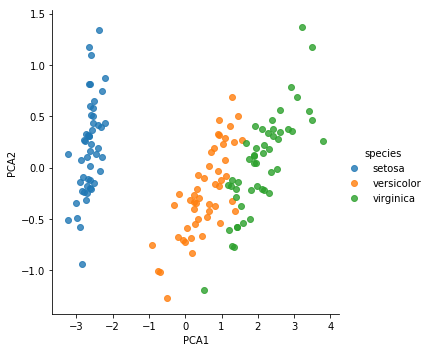

In [10]:
model = PCA(n_components=2) #Reduce dimensionality to 2d
model.fit(X_iris)
X_2D = model.transform(X_iris) 

#Visualise using the original data frame:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

This validates our use of a simple classification algorithm because the data are quite well-separated.

We now continue to use unsupervised learning by looking at clustering. This tests how well machine learning methods (GMM in our case) can recover the underlying labelling. 

/home/chroli/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/chroli/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/chroli/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/chroli/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecatio

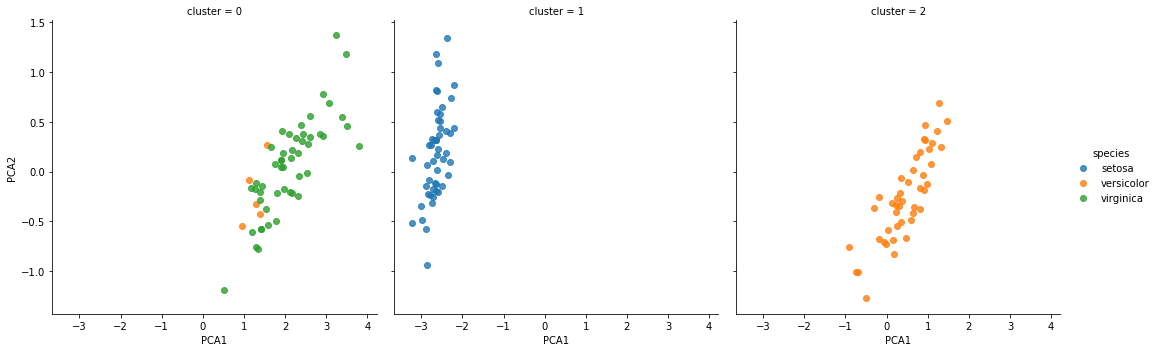

In [13]:
model = GMM(n_components=3,
            covariance_type='full') #Split into 3 groups
model.fit(X_iris)
y_gmm = model.predict(X_iris)

iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

We thus see that the three categories are recovered very well. 